In [1]:
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Cargar modelo
model = load_model("modelo_ejercicios.h5")

# Clases
clases = [
    'barbell biceps curl', 'bench press', 'chest fly machine', 'deadlift',
    'decline bench press', 'hammer curl', 'hip thrust', 'incline bench press',
    'lat pulldown', 'lateral raises', 'leg extension', 'leg raises', 'plank',
    'pull up', 'push up', 'romanian deadlift', 'russian twist', 'shoulder press',
    'squat', 't bar row', 'tricep dips', 'tricep pushdown'
]

# MediaPipe pose config
mp_pose = mp.solutions.pose
pose_model = mp_pose.Pose(static_image_mode=True)
pose_landmark = mp_pose.PoseLandmark

# Evaluación de postura
def evaluar_postura_por_ejercicio(ejercicio, landmarks):
    if not landmarks:
        return "No se detectaron puntos"

    get = lambda lm: landmarks.landmark[lm]
    altura = lambda lm: get(lm).y
    diff = lambda a, b: abs(altura(a) - altura(b))

    ejercicio = ejercicio.lower()

    if ejercicio == "squat":
        if altura(pose_landmark.RIGHT_KNEE) > altura(pose_landmark.RIGHT_HIP):
            return "Squat bien hecho ✔️"
        else:
            return "Squat incompleto ❌"

    elif ejercicio == "push up":
        if altura(pose_landmark.RIGHT_ELBOW) > altura(pose_landmark.RIGHT_SHOULDER):
            return "Buena bien hecho ✔️"
        else:
            return "Push-up incompleto ❌"

    elif ejercicio == "plank":
        if diff(pose_landmark.RIGHT_SHOULDER, pose_landmark.RIGHT_HIP) < 0.05 and \
           diff(pose_landmark.RIGHT_HIP, pose_landmark.RIGHT_ANKLE) < 0.05:
            return "Plank alineado ✔️"
        else:
            return "Plank desalineado ❌"

    else:
        return "Sin reglas definidas para este ejercicio"

# Función principal
def detectar_ejercicio_y_postura(ruta_img):
    # --- Predicción del ejercicio ---
    img = image.load_img(ruta_img, target_size=(128, 128))
    x = np.expand_dims(np.array(img)/255.0, axis=0)
    pred = model.predict(x)
    clase_index = np.argmax(pred)
    ejercicio = clases[clase_index]
    confianza = float(np.max(pred))

    # --- MediaPipe landmarks ---
    img_cv = cv2.imread(ruta_img)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    results = pose_model.process(img_rgb)
    feedback = evaluar_postura_por_ejercicio(ejercicio, results.pose_landmarks)

    # --- Mostrar resultado ---
    plt.imshow(Image.open(ruta_img))
    plt.axis('off')
    plt.title(f"{ejercicio} ({confianza:.2f})\n{feedback}", fontsize=12)
    plt.show()

    return ejercicio, feedback


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


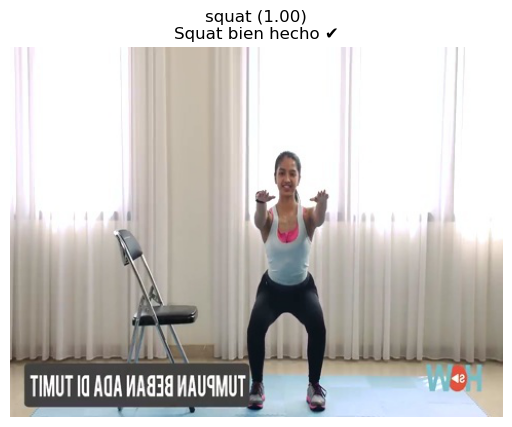

Ejercicio detectado: squat
Evaluación de postura: Squat bien hecho ✔️


In [3]:
ruta = "C:/Users/Anibal M/Desktop/hito 2 ML/dataset+/squat/squat_1900111_fliph.jpg"
ejercicio, feedback = detectar_ejercicio_y_postura(ruta)
print(f"Ejercicio detectado: {ejercicio}")
print(f"Evaluación de postura: {feedback}")